## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [98]:
! git clone https://github.com/tkj9ep/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [99]:
import numpy as np
import pandas as pd

cars_location = "/content/knn/data/USA_cars_datasets.csv"

cars_dataset = pd.read_csv(cars_location)

columns_of_interest = ["price", "year", "mileage"]

cars_dataset = cars_dataset[columns_of_interest]
print(cars_dataset.shape)
cars_dataset.head()

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [100]:
cars_dataset.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no `NA` values because the count of each variable is equal to the number of examples in the dataset.

2. Maxmin normalize `year` and `mileage`.

In [101]:
# normalizing function
def maxmin(z):
  z = (z - min(z)) / (max(z) - min(z))
  return z

In [120]:
features = ["year", "mileage"]

x_cars_dataset = cars_dataset.drop(columns = ["price"], axis = 1).apply(lambda z : maxmin(z))
y_cars_dataset = cars_dataset["price"]
x_cars_dataset.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [121]:
from sklearn.model_selection import train_test_split

cars_x_train, cars_x_test, cars_y_train, cars_y_test = train_test_split(x_cars_dataset, y_cars_dataset, test_size = .2, random_state = 17)

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

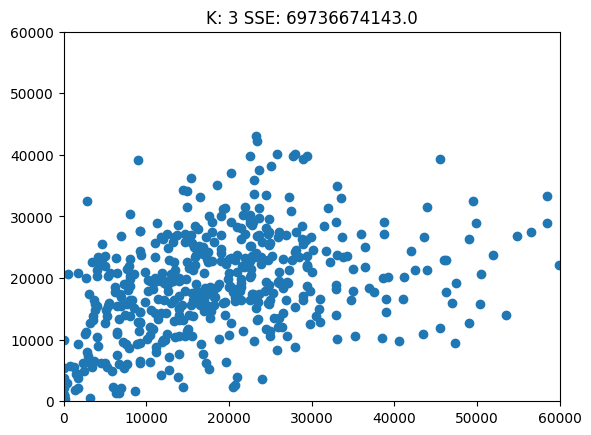

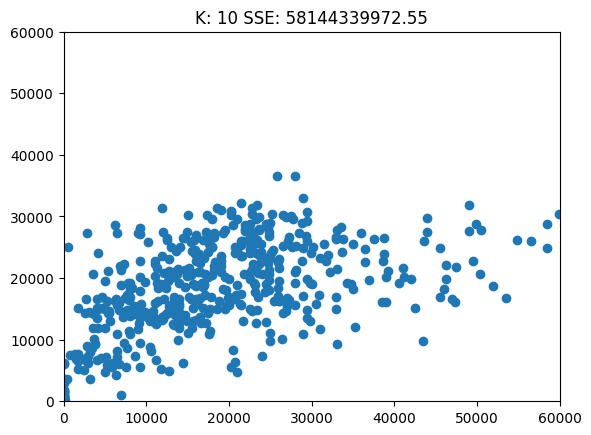

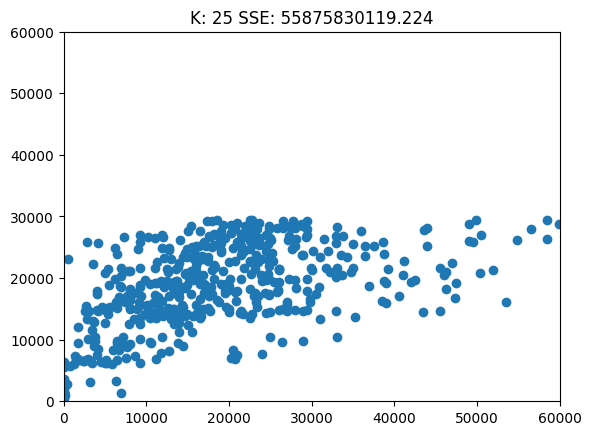

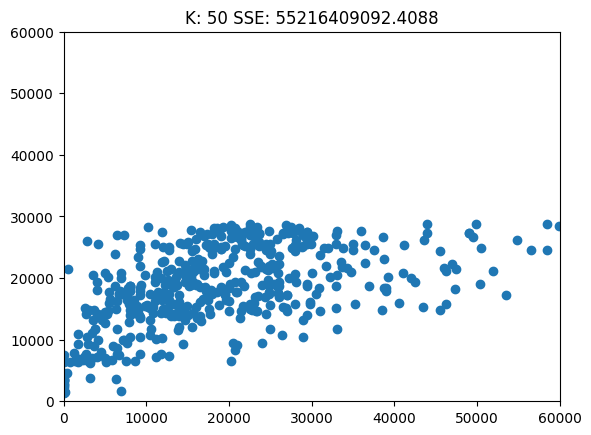

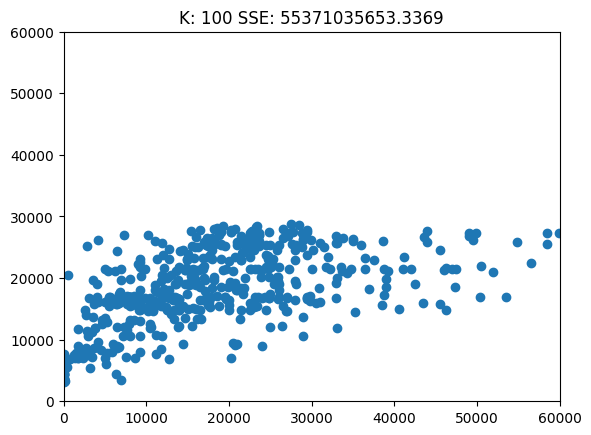

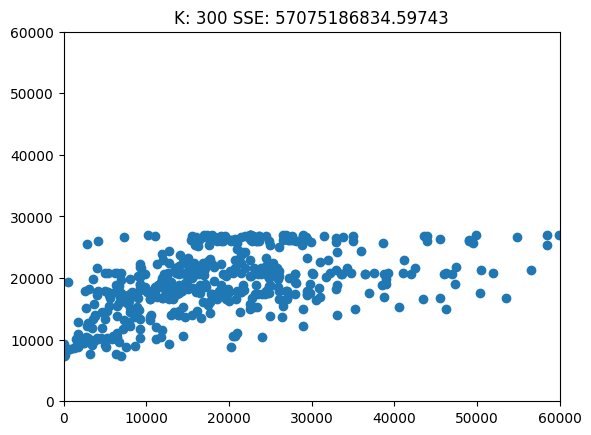

In [122]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import math
import matplotlib.pyplot as plt

k_list = [3, 10, 25, 50, 100, 300]

# fitting the model
SSE_list = []

for i in range(len(k_list)):
  cars_model = KNeighborsRegressor(n_neighbors = int(k_list[i]))
  cars_fitted_model = cars_model.fit(cars_x_train, cars_y_train)
  cars_y_hat = cars_fitted_model.predict(cars_x_test)

  plot, axes = plt.subplots()
  sse = np.sum((cars_y_hat - cars_y_test).apply(lambda z : math.pow(z, 2)))
  plt.scatter(cars_y_test, cars_y_hat)
  plt.title("K: " + str(k_list[i]) + " SSE: " + str(sse))
  axes.set_ylim(0, 60000)
  axes.set_xlim(0, 60000)
  plt.show()

I notice that the patterns generally follow a linear pattern. However, as the value of *k* increases, the datapoints in the scatterplot seem to plateau.

5. Determine the optimal $k$ for these data.

Best K: 86
Best SSE: 56421913274.356575


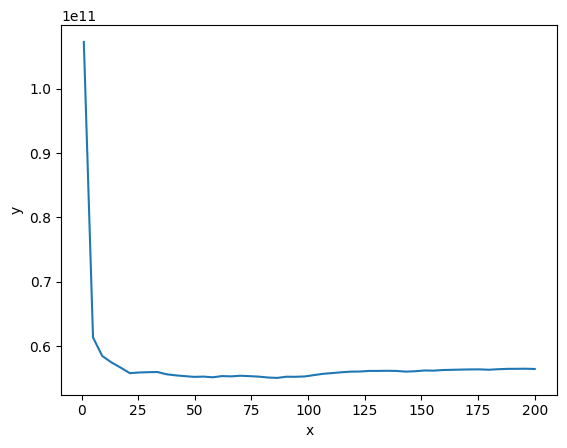

In [124]:
# fitting the model
k_max = 200
k_list = np.linspace(1, k_max)
SSE_list = []

best_k = 0
best_sse = 100000000000000000000

for i in range(len(k_list)):
  cars_model = KNeighborsRegressor(n_neighbors = int(k_list[i]))
  cars_fitted_model = cars_model.fit(cars_x_train, cars_y_train)

  cars_y_hat = cars_fitted_model.predict(cars_x_test)
  sse = np.sum((cars_y_hat - cars_y_test).apply(lambda z : math.pow(z, 2)))
  SSE_list.append(sse)

  if sse < best_sse:
    best_sse = sse
    best_k = int(k_list[i])

plt.plot(k_list, SSE_list)
plt.xlabel("x")
plt.ylabel("y")

print("Best K:", best_k)
print("Best SSE:", sse)

The optimal *k* seems to be around $86$.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As *k* increased, the plots seem to start linear and look more like a plateau. Since it seems like the optimal *k* happens to be $86$, values below it will not have enough capacity to handle the complexity causing the model to most likely underfit. Values above the optimal *k* will have a model that has too much capacity causing the model to overfit. At higher *k* values such as $300$, the predictions seem to go towards teh average values. In addition, higher *k* values will naturally have more points centered around denser clusters which can cause the model to overemphasize the more common points as opposed to considering all the points in general.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [106]:
location = "/content/knn/data/heart_failure_clinical_records_dataset.csv"

heart_failure_dataset = pd.read_csv(location)
heart_failure_dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [107]:
heart_failure_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [108]:
heart_failure_dataset.isnull().values.any()

False

There are no `nan` or `NA` values since there $299$ out of $299$ values that are non-null.  

In [109]:
heart_failure_dataset = heart_failure_dataset.drop(columns = ["time"], axis = 1)

2. Make a correlation matrix. What variables are strongly associated with a death event?

In [110]:
heart_failure_dataset.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


The variables that have the strongest correlation with the **DEATH EVENT** is **serum_creatinine**, **age**, and **ejection_fraction**.

3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [111]:
dummy_variables = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

for variable in dummy_variables:
  print(heart_failure_dataset[[variable, "DEATH_EVENT"]].groupby(variable).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

It seems as if **high_blood_pressure** has a higher proportion of death when its value is $1$ with a $.37$ chance compared to the $.29$ when the value is $0$. **Anaemia** seems to also be a variable where if the value is $1$, then there is a higher chance of death than for when its value is $0$. Other variables have either very similar probabilities both $0$ and $1$ or $0$ tends to be more likely.

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [112]:
highest_predictor_variables = ["anaemia", "high_blood_pressure", "serum_creatinine", "age", "ejection_fraction"]

x = heart_failure_dataset[highest_predictor_variables]
y = heart_failure_dataset["DEATH_EVENT"]

5. Maxmin normalize all of the variables in `X`.

In [113]:
x = x.apply(lambda z : maxmin(z))

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 17)

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

Best K: 26
Best SSE: 9.48


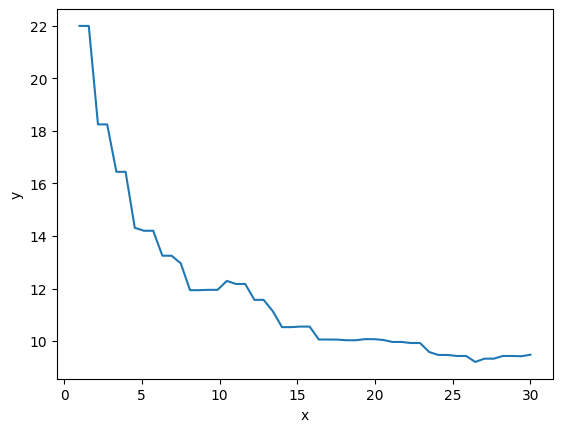

In [115]:
# fitting the model
k_max = 30
k_steps = 50
k_list = np.linspace(1, k_max, num = k_steps)
SSE_list = []

best_k = 0
best_sse = 10000000

for i in range(len(k_list)):
  model = KNeighborsRegressor(n_neighbors = int(k_list[i]))
  fitted_model = model.fit(x_train, y_train)

  y_hat = fitted_model.predict(x_test)
  sse = np.sum((y_hat - y_test).apply(lambda z : math.pow(z, 2)))
  SSE_list.append(sse)

  if sse < best_sse:
    best_sse = sse
    best_k = int(k_list[i])

plt.plot(k_list, SSE_list)
plt.xlabel("x")
plt.ylabel("y")

print("Best K:", best_k)
print("Best SSE:", sse)

The best **k** is $26$ with an **sse** of $9.48$.

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')
Best K: 23
Best SSE: 10.07777777777778


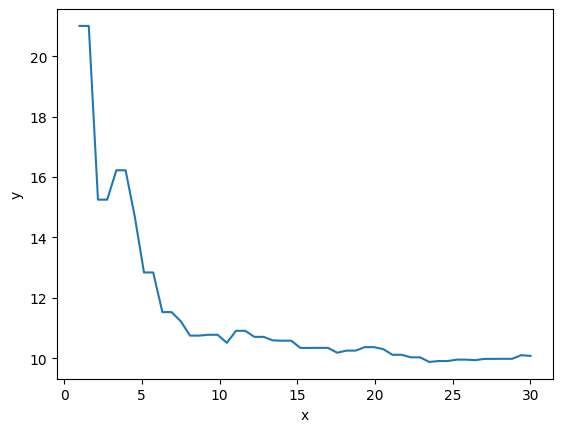

In [116]:
heart_failure_dataset = heart_failure_dataset.apply(lambda z : maxmin(z))
heart_failure_dataset = heart_failure_dataset.drop(columns = ["DEATH_EVENT"], axis = 1)
print(heart_failure_dataset.columns)

x_train, x_test, y_train, y_test = train_test_split(heart_failure_dataset, y, test_size = .2, random_state = 17)

# fitting the model
k_max = 30
k_steps = 50
k_list = np.linspace(1, k_max, num = k_steps)
SSE_list = []

best_k = 0
best_sse = 10000000

for i in range(len(k_list)):
  model = KNeighborsRegressor(n_neighbors = int(k_list[i]))
  fitted_model = model.fit(x_train, y_train)

  y_hat = fitted_model.predict(x_test)
  sse = np.sum((y_hat - y_test).apply(lambda z : math.pow(z, 2)))
  SSE_list.append(sse)

  if sse < best_sse:
    best_sse = sse
    best_k = int(k_list[i])

plt.plot(k_list, SSE_list)
plt.xlabel("x")
plt.ylabel("y")

print("Best K:", best_k)
print("Best SSE:", sse)

The first model with only the selected parameters has lower score of $9.48$ than the one that uses all the variables with an error of $10.08$. In practice, I would prefer something with more variables but with more fine-tuning. Decreasing the number of variables seems to reduce the amount of noisiness in the data.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)